# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score,confusion_matrix

# **Upload and Read Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Huawei\ Eta/GP/playground-series-s3e17.zip

Archive:  /content/drive/MyDrive/Huawei Eta/GP/playground-series-s3e17.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

# **EDA**

In [ ]:
train.shape

(136429, 14)

In [ ]:
test.shape

(90954, 13)

In [ ]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


Check for Missing and duplicated Values

In [ ]:
train.isnull().sum()

,0
id,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [ ]:
test.isnull().sum()

,0
id,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
TWF,0
HDF,0


In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
test.duplicated().sum()

np.int64(0)

Check for Balance of target

In [ ]:
train['Machine failure'].value_counts()

,count
Machine failure,
0,134281
1,2148


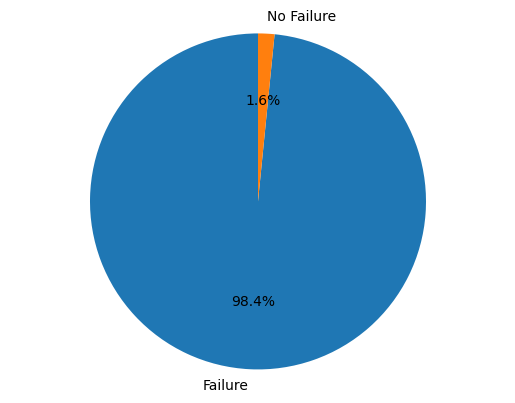

In [ ]:
labels = ['Failure', 'No Failure']
sizes = train['Machine failure'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

So Data is imblanced

In [ ]:
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns

In [ ]:
categorical_features

Index(['Product ID', 'Type'], dtype='object')

In [ ]:
train['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

# **Preprocessing**

In [ ]:
# Drop id and Profuct ID Columns
train.drop(['id', 'Product ID'], axis=1, inplace=True)
test.drop(['id', 'Product ID'], axis=1, inplace=True)

In [ ]:
le = LabelEncoder()
train['Type'] = le.fit_transform(train['Type'])
test['Type'] = le.transform(test['Type'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     136429 non-null  int64  
 1   Air temperature [K]      136429 non-null  float64
 2   Process temperature [K]  136429 non-null  float64
 3   Rotational speed [rpm]   136429 non-null  int64  
 4   Torque [Nm]              136429 non-null  float64
 5   Tool wear [min]          136429 non-null  int64  
 6   Machine failure          136429 non-null  int64  
 7   TWF                      136429 non-null  int64  
 8   HDF                      136429 non-null  int64  
 9   PWF                      136429 non-null  int64  
 10  OSF                      136429 non-null  int64  
 11  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 12.5 MB


In [ ]:
# Define X (features) and y (target)
X = train.drop(columns=['Machine failure'])
y = train['Machine failure']

# Random Oversampling
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create DataFrame with resampled data
train = pd.DataFrame(X_resampled, columns=X.columns)
train['Machine failure'] = y_resampled

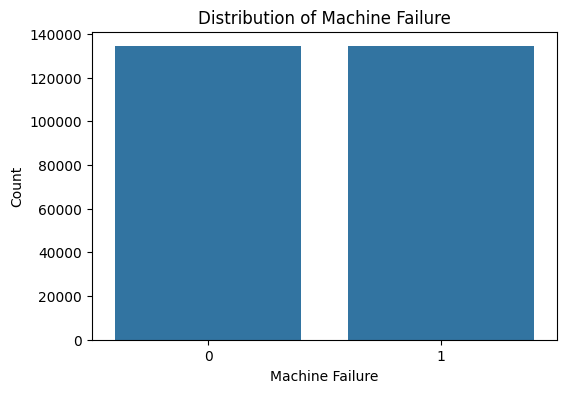

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine failure', data=train)
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

In [ ]:
train.shape

(268562, 12)

In [ ]:
train.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure'],
      dtype='object')

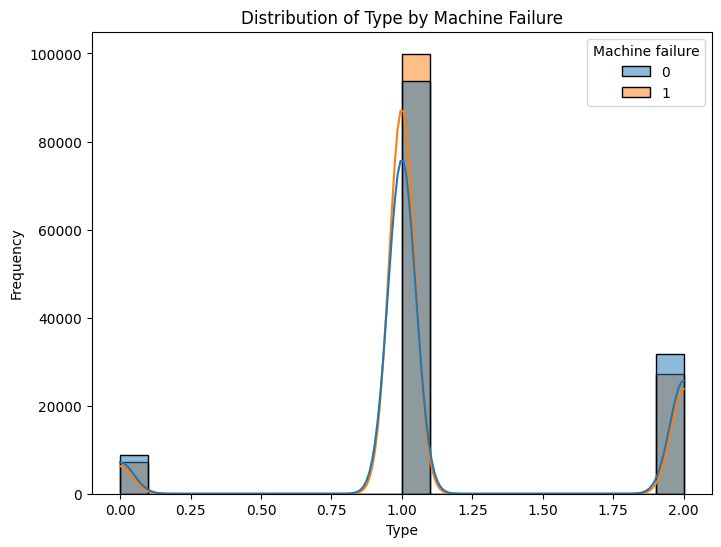

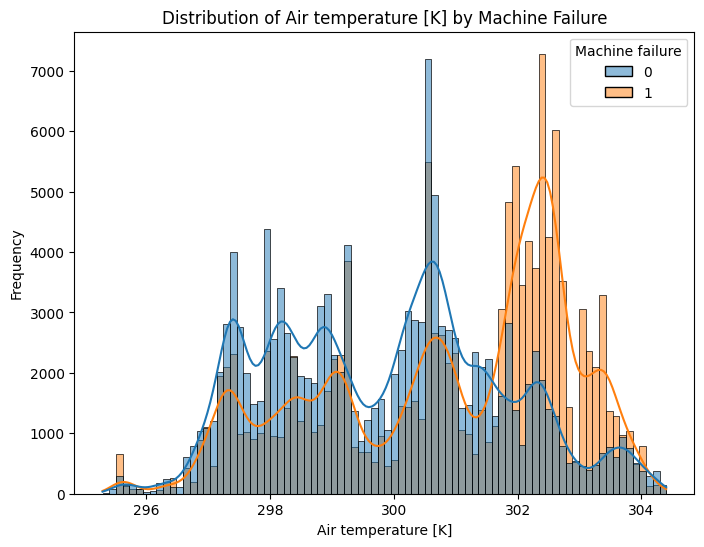

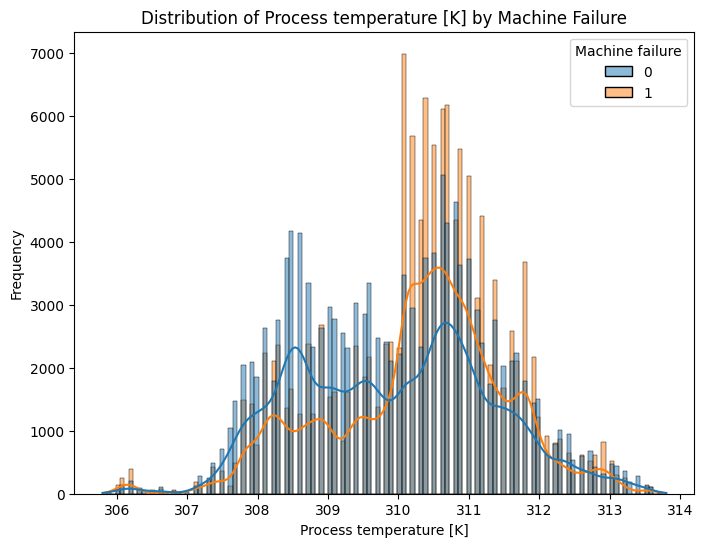

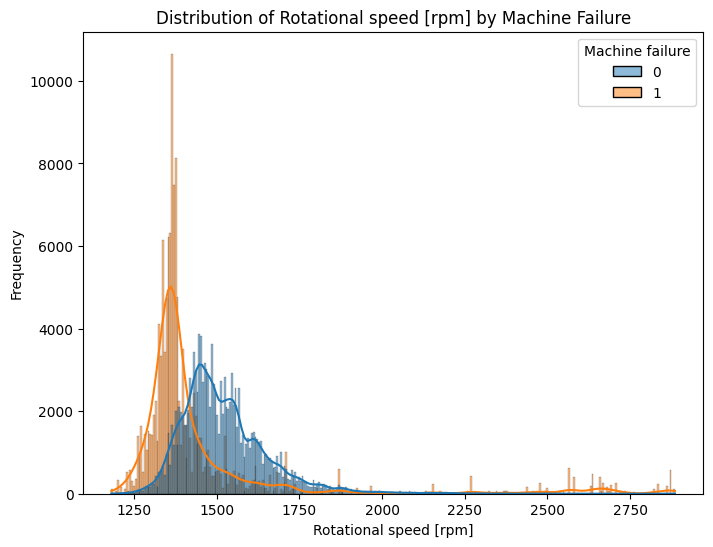

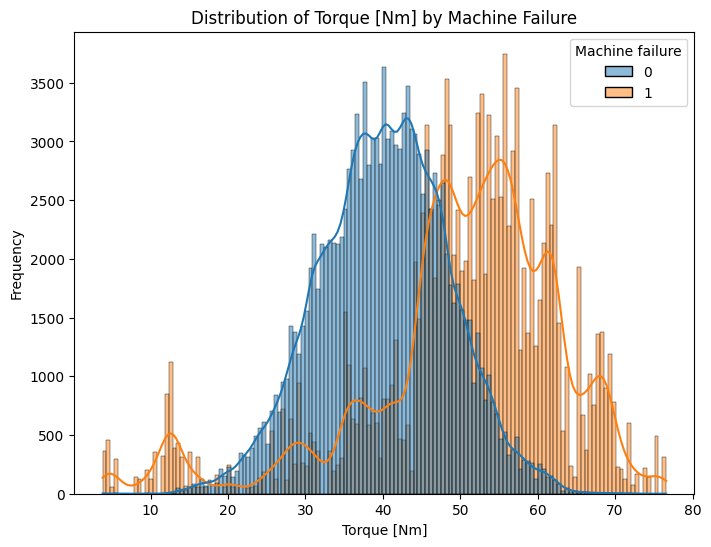

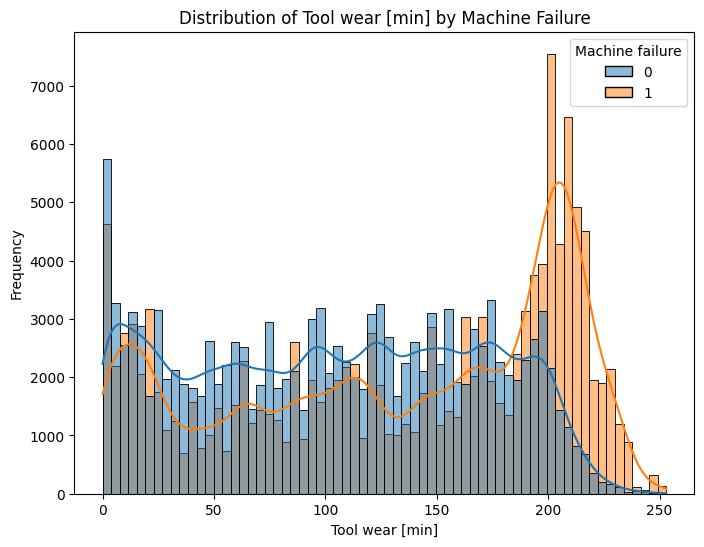

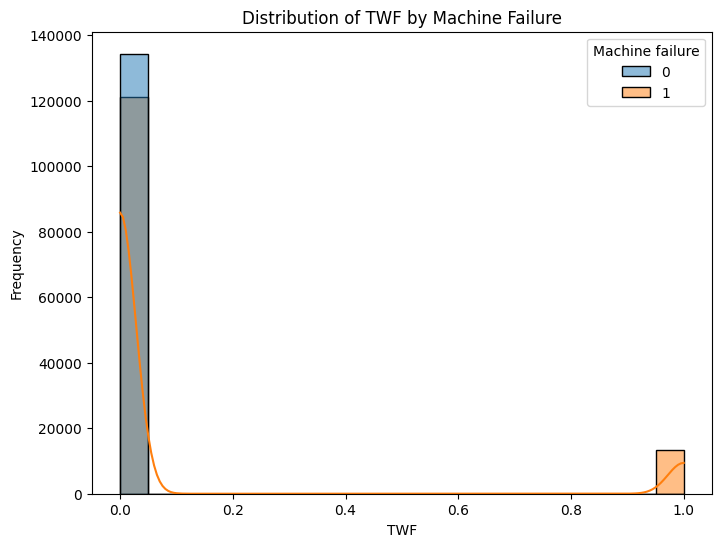

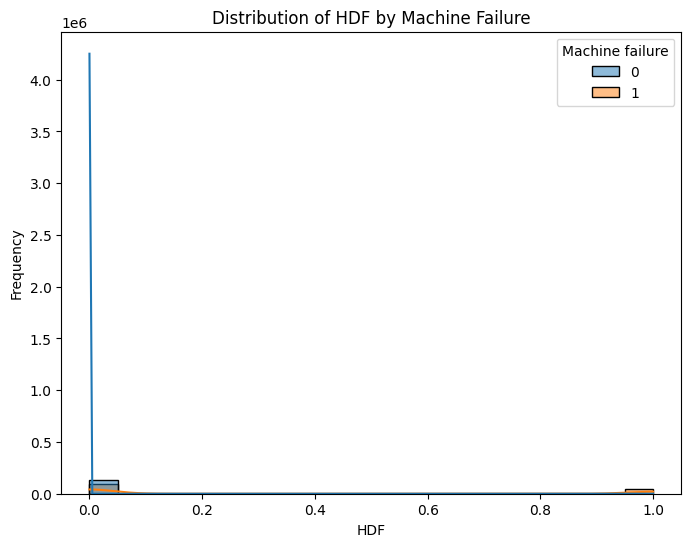

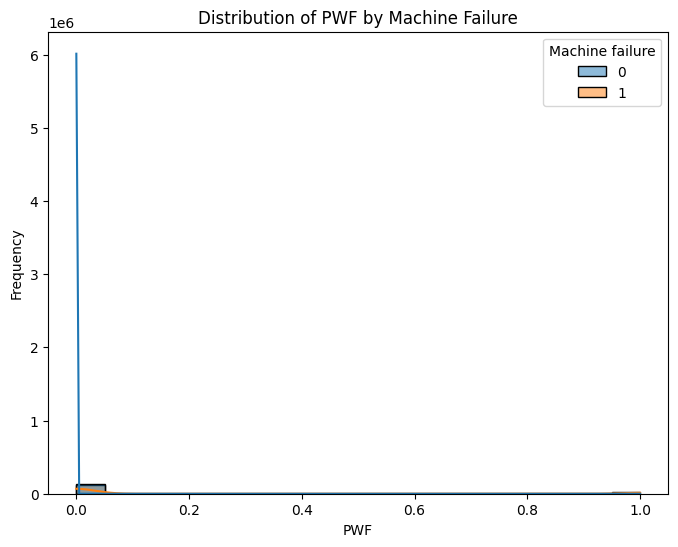

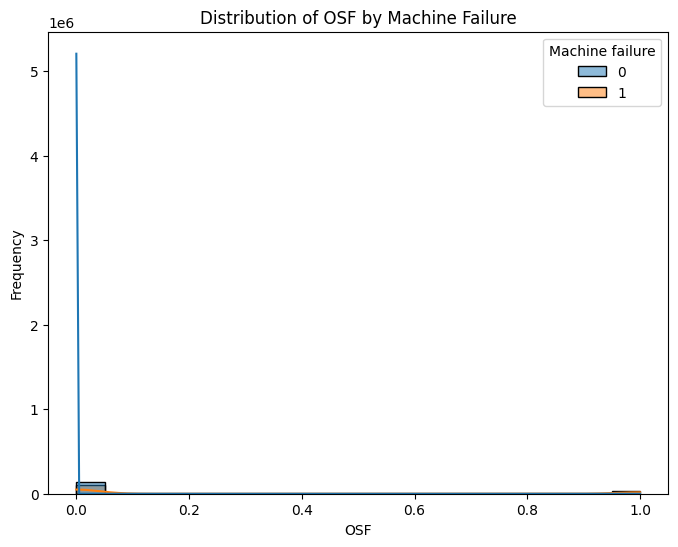

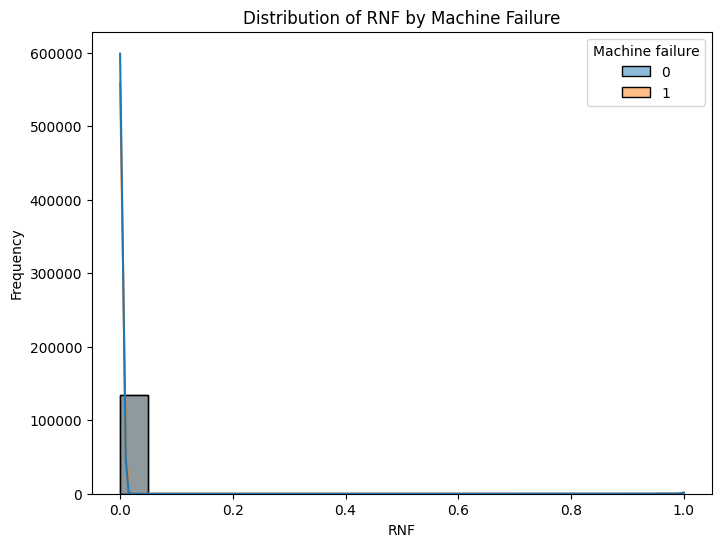

In [ ]:
for col in train.drop(columns=['Machine failure']).columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=train, x=col, hue='Machine failure', kde=True)
  plt.title(f'Distribution of {col} by Machine Failure')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

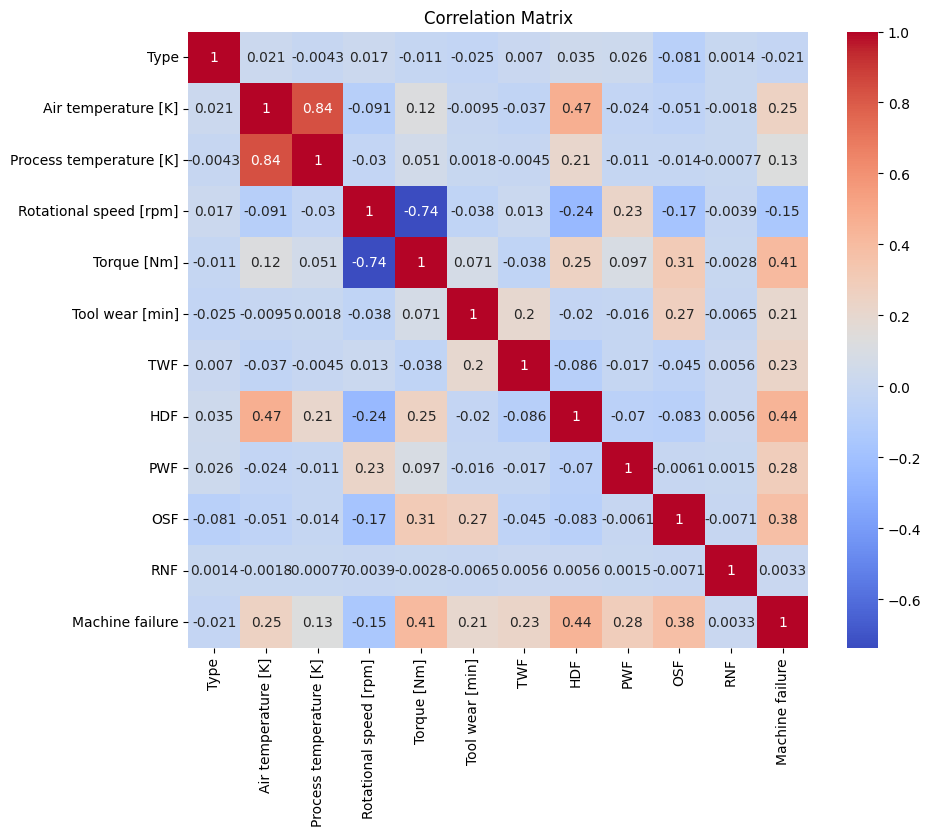

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
scaler = StandardScaler()
train = scaler.fit_transform(train)

In [ ]:
train = pd.DataFrame(train, columns=X.columns.tolist() + ['Machine failure'])

# **Split Data**

In [ ]:
X = train.drop(columns=['Machine failure'])
y = train['Machine failure']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict on the validation set
y_pred_rf = rf_model.predict(X_val)
# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
report_rf = classification_report(y_val, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:\n", report_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)

Random Forest Accuracy: 0.9994600934596839
Random Forest Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     26879
         1.0       1.00      1.00      1.00     26834

    accuracy                           1.00     53713
   macro avg       1.00      1.00      1.00     53713
weighted avg       1.00      1.00      1.00     53713

Random Forest Confusion Matrix:
 [[26850    29]
 [    0 26834]]


# **Evaluation**

In [ ]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.99966489 0.99960903 0.99949732 0.99955317 0.99946008]
Mean cross-validation score: 0.9995568987417383


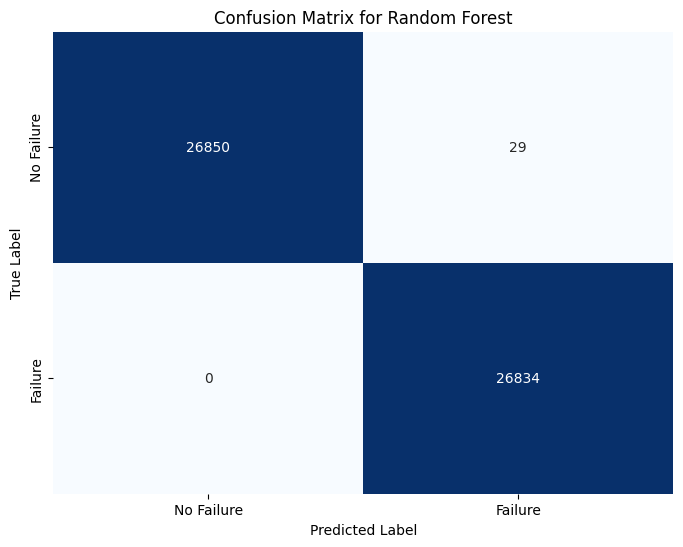

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

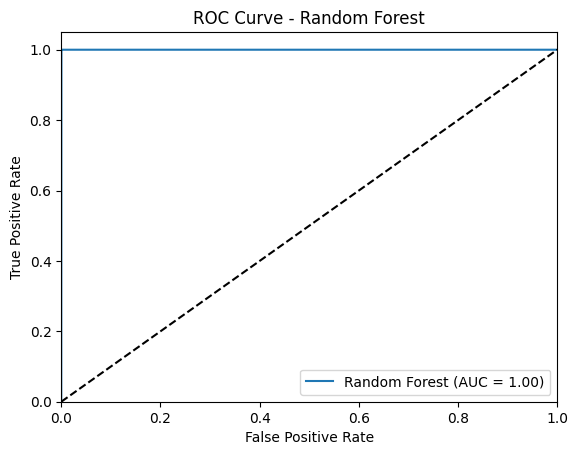

In [ ]:
# ROC curve and AUC
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_prob_rf)
auc_rf = roc_auc_score(y_val, y_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(f"Test Accuracy: {accuracy_rf}")

Test Accuracy: 0.9994600934596839


In [ ]:
# Evaluate on the training set
y_train_pred_rf = rf_model.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)

print(f"Random Forest Training Accuracy: {accuracy_train_rf}")
print(f"Random Forest Validation Accuracy: {accuracy_rf}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Let's also look at the difference
print(f"Difference between Training and Validation Accuracy: {accuracy_train_rf - accuracy_rf}")
print(f"Difference between Training and Mean CV Accuracy: {accuracy_train_rf - cv_scores.mean()}")

Random Forest Training Accuracy: 0.999883639207071
Random Forest Validation Accuracy: 0.9994600934596839
Mean cross-validation score: 0.9995568987417383
Difference between Training and Validation Accuracy: 0.0004235457473871218
Difference between Training and Mean CV Accuracy: 0.00032674046533276435
